<a href="https://colab.research.google.com/github/jpscard/IA-Conexionista-UFSC/blob/main/03_Conceitos_B%C3%A1sicos_de_ML_(Regress%C3%A3o_Linear_e_Polinomial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução Prática aos Principais Conceitos de Aprendizado de Máquina**

## Ao longo desta aula vamos nos familiarizar com os principais conceitos:

*   Dados
*   Atributos
*   Regressão
*   Classificação
*   Treinamento
*   Validação
*   Teste
*   Gradiente Descendente
*   Função de Custo
*   Normalização
*   Regularização
*   Redução Dimensional














## Em primeiro lugar, vamos importar as bibliotecas necessárias.

In [1]:
import numpy as np                                                     # ndarrys for gridded data
import pandas as pd                                                    # DataFrames for tabular data
import os                                                              # set working directory, run executables
import matplotlib.pyplot as plt                                        # for plotting
import matplotlib.image as mpimg
import seaborn as sns

## Vamos preparar tudo para podermos ler os nossos arquivos de dados

In [2]:
os.getcwd()

'/content'

In [3]:
#from google.colab import drive
#drive.mount('/content/gdrive')

## Regressão Linear Univariável
### No nosso primeiro exemplo, vamos ler o arquivo Grainsize_Por.csv que contém os dados de tamanho de grão e porosidade de uma série de amostras de rochas.



In [4]:
url="https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/GrainSize_Por.csv"
df=pd.read_csv(url)
df.head()

,Grainsize,Porosity
0,2.689284,5.400000
1,6.683638,10.647582
2,9.877106,7.926271
3,12.239344,11.278953
4,27.623312,10.508753


In [5]:
#df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Grainsize_Por.csv')         # read a .csv file in as a DataFrame
#df.head()                                                   # we could also use this command for a table preview

Após a leitura dos dados, veja o nome da variáveis, transfira para as variáveis X e Y e imprima quantos dados existem no arquivo

In [6]:
for x in df.columns:                                        # find the names of the columns!
    print(x)                                                # other option is:      list(df.columns)

data = df.to_numpy()
X = data[:,0]
y = data[:,1]

m = y.size        # number of training examples
print('Número de exemplos de treinamento: ',m)

Xtrain, ytrain = np.expand_dims(X,axis=1), np.expand_dims(y,axis=1) # lets put the data in 2D-array format!!!!


Grainsize
Porosity
Número de exemplos de treinamento:  20


### Plotando os dados
Antes de iniciar qualquer tarefa, geralmente é útil compreender os dados visualizando-os. Para este conjunto de dados, você pode usar um gráfico de dispersão (scatter plot) para visualizar os dados, uma vez que ele tem apenas duas propriedades para representar (tamanho de grão e porosidade). Muitos outros problemas que você encontrará na vida real são multidimensionais e não podem ser plotados em um gráfico 2-d. Existem muitas bibliotecas de plotagem em python (consulte esta [postagem de blog](https://blog.modeanalytics.com/python-data-visualization-libraries/) para um bom resumo das mais populares).

Nesta parte do curso, usaremos exclusivamente matplotlib para fazer toda a plotagem. matplotlib é uma das bibliotecas de plotagem científica mais populares em python e possui ferramentas e funções abrangentes para fazer lindos gráficos. pyplot é um módulo dentro do matplotlib que fornece uma interface simplificada para as tarefas de plotagem mais comuns do matplotlib, imitando a interface de plotagem do MATLAB.

Text(0, 0.5, 'Porosidade em %')

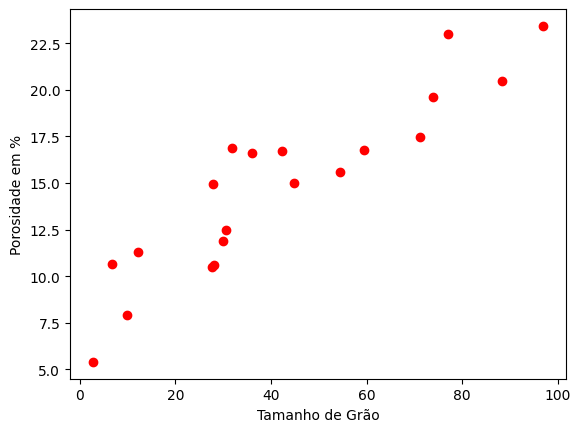

In [7]:
plt.scatter(Xtrain,ytrain,c='red')
plt.xlabel('Tamanho de Grão')
plt.ylabel('Porosidade em %')

## Aprendizado Supervisionado
Neste problema estamos diante de uma situação de **Aprendizado Supervisionado**, ou seja, nos dados disponíveis temos uma Saída conhecida associada a cada dado de Entrada.
### Regressão Linear
Um problema de Regressão é aquele onde tentamos predizer o valor de uma variável **contínua** de saída.

Quando vemos uma relação em um diagrama de dispersão, podemos usar uma reta para modelar essa relação nos dados. Também podemos usar essa reta para fazer previsões a partir dos dados. Este processo é chamado de regressão linear.
### Definindo a Hipótese
Olhando para estes dados, podemos imaginar que uma "linha reta" é uma **hipótese** bastante razoável para modelar o Tamanho de Grão está relacionado com a Porosidade. Vamos então nos lembrar da **Equação da Reta**:

$$h_\theta(x) = \theta_0 + \theta_1x$$

onde $\theta_0$ é a interceptação em $y$ (*intercept*) e $\theta_1$ é o coeficiente angular da reta (*slope*).
### Parâmetros do Modelo
Se variarmos $\theta_0$ e $\theta_1$ podemos criar infinitas retas.

Vamos agora setar alguns valores de $\theta_0$ e $\theta_1$ e plotar algumas retas sobre os dados.





[-0.03438005 -0.14232322 -0.04044712 -0.14925198  0.15250983  0.11114293
 -0.01600304 -0.05479602  0.1689133   0.02881609]


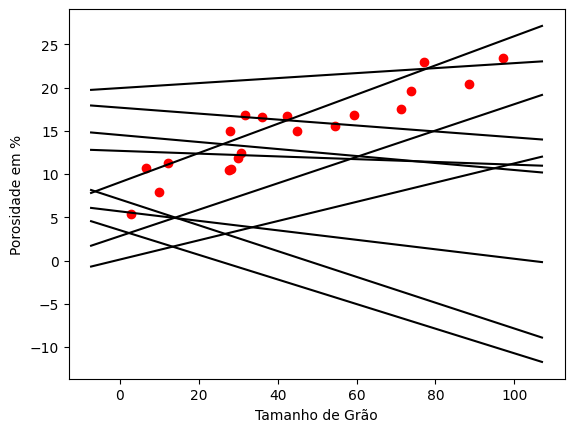

In [8]:
plt.scatter(Xtrain,ytrain,c='red')
plt.xlabel('Tamanho de Grão')
plt.ylabel('Porosidade em %')

theta0_vals = np.random.random(10)*20
theta1_vals = (np.random.random(10)-0.5)*0.5

print(theta1_vals)

x0 = min(Xtrain)-10
x1 = max(Xtrain)+10

#for i, theta0 in enumerate(theta0_vals):
#    for j, theta1 in enumerate(theta1_vals):
for i in range(theta0_vals.size):
      y0 = theta0_vals[i] + theta1_vals[i]*x0
      y1 = theta0_vals[i] + theta1_vals[i]*x1
      x_values = [x0, x1]
      y_values = [y0, y1]
      plt.plot(x_values, y_values, '-k')



### Função de Custo (*Loss*)
Já falamos sobre a Regressão, a Hipótese (que neste caso é linear) e os Parâmetros do Modelo. Vimos que se variarmos os parâmetros podemos obter vários modelos. A questão agora é termos uma **métrica** que nos permita dizer quão bom é um dado modelo para **prever** os dados disponíveis. Esta métrica é o que chamamos de **Função de Custo** ou ***Loss***.

Para este problema de regressão uma boa maneira de medir quão boa uma dada reta é como solução para o nosso problema é medir o quanto a reta **erra** ao fazer a predição considerando os dados disponíveis.

Para **uma** dada observação $i$ no nosso conjunto de dados, podemos definir o **erro** cometido pelo modelo como:
$$Erro(i) = y(i) - h_\theta(x(i)),$$ ou seja
$$Erro(i) = y(i) - (\theta_0 + \theta_1*x(i)).$$

Para obter o **custo** ou erro total, poderíamos somar todos erros correspondentes às $m$ amostras de dados disponíveis e dividir pela quantidade de amostras. Entretanto, só somar não é uma boa idéia, pois erros positivos anulam erros negativos e poderíamos hipoteticamente chegar a erro zero com um modelo muito ruim.

Temos então, 2 outras alternativas para a Função de Custo:


*   O **Erro Médio Absoluto (EMA)**, também conhecido como ***L1 Score*** cuja fórmula é:
$$L1(\theta_0,\theta_1) = \frac{1}{m} \sum\limits_{i=1}^m |{y(i) - h_\theta(x(i))}|$$

Use EMA quando estiver fazendo regressão e não quiser que os valores discrepantes (***outlliers***) desempenhem um papel importante. Também pode ser útil se você souber que sua distribuição é multimodal e é desejável ter previsões em um dos modos, em vez de na média deles.

*   O **Erro Médio Quadrático (EMQ)**, também conhecido como ***L2 Score*** cuja fórmula é:
$$L2(\theta_0,\theta_1) = \frac{1}{m} \sum\limits_{i=1}^m ({y(i) - h_\theta(x(i))})^2$$  

é comum também dividirmos o resultado final por 2, como na fórmula a seguir. A razão desta divisão por uma constante adicional vai ficar mais clara no futuro.

$$L2(\theta_0,\theta_1) = \frac{1}{2m} \sum\limits_{i=1}^m ({y(i) - h_\theta(x(i))})^2$$

Use EMQ ao fazer regressão, acreditando que sua variável de saída, condicionada aos dados de entrada, é normalmente distribuída e deseja que erros grandes sejam significativamente (quadraticamente) mais penalizados do que pequenos.

**Em geral, a Função de Custo L2 (EMQ) é preferida na maioria dos casos.**

A seguir vamos implementar a Função de Custo L2 como uma sub-rotina em python.

<div class = "alert alert-block alert-warning">

* Nota de implementação 1:  
Uma boa prática para tornar nossos programas mais rápidos é, sempre que possível, substituir os laços do tipo *for* por operações de multiplicação de matrizes. É o que chamamos de **VETORIZAÇÃO**.

* Nota de implementação 2:  
Nós armazenamos cada exemplo como uma linha na matriz $ X $ `numpy` em Python . Para levar em consideração o termo de intercept ($ \theta_0 $), adicionamos uma primeira coluna a $ X $ com o valor 1 (um) para todas as linhas. Isso nos permite tratar $ \theta_0 $ simplesmente como mais um dado de entrada (sempre igual a 1).

</div>

In [9]:
def computeCost(X, y, theta):

    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n), where m is the number of examples,
        and n is the number of features.
        We need to append a vector of one's to the features so we have
        n+1 columns.

    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, 1).

    theta : array_like
        The parameters for the regression function. This is a vector of
        shape (n+1, ).

    Returns
    -------
    L2 : float
        The value of the regression cost function.

    """
    # initialize some useful values
    m = np.size(y)  # number of training examples

    # make a copy of X and theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    Xin = X.copy() # copy training data to preserve original data
    thetain = theta.copy() # copy theta to preserve original data
    thetain = thetain.reshape(-1,1) # transform theta from a 1D array to 2D array

    # You need to return the following variables correctly
    L2 = 0

    # Add a column of ones to X. The numpy function stack joins arrays along a given axis.
    # The first axis (axis=0) refers to rows (training examples)
    # and second axis (axis=1) refers to columns (features).
    a = np.ones((m,1))
    Xin = np.hstack((a, Xin))

    # Calculate the hypothesis X * theta  [m,n+1] x [n+1,1] matrix multiplication
    hx = Xin @ thetain

    L2 = np.sum(np.square(hx-y))/(2.0*m)

    # ===========================================================
    return L2

Depois de concluir a codificação, a próxima etapa é executar a função computeCost duas vezes usando duas inicializações diferentes de $\theta$. Você verá o custo impresso na tela.

In [10]:
L2 = computeCost(Xtrain, ytrain, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % L2)
print('Expected cost value (approximately) 121.38\n')

# further testing of the cost function
L2 = computeCost(Xtrain, ytrain, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % L2)
print('Expected cost value (approximately) 3631.30')

With theta = [0, 0] 
Cost computed = 121.38
Expected cost value (approximately) 121.38

With theta = [-1, 2]
Cost computed = 3631.30
Expected cost value (approximately) 3631.30


### Visualizando $ L2 (\Theta) $

Para entender melhor a função de custo $ L2 (\Theta) $, vamos agora representar graficamente o custo em uma grade bidimensional de valores $ \theta_0 $ e $ \theta_1 $. Você não precisará codificar nada novo para esta parte, mas deve entender como o código que já escrevemos está criando essas imagens.

Na próxima célula, o código é configurado para calcular $ L2 (\Theta) $ sobre uma grade de valores usando a função `computeCost` que escrevemos acima. Depois de executar a célula a seguir, você terá um array 2-D de valores $ L2 (\Theta) $. Então, esses valores são usados ​​para produzir gráficos de superfície e contorno de $ L2 (\Theta) $ usando as funções matplotlib `plot_surface` e` contourf`. Os gráficos devem ser parecidos com o mostrado abaixo.

O objetivo desses gráficos é mostrar como $ L2 (\Theta) $ varia com as mudanças em $ \theta_0 $ e $ \theta_1 $. A função de custo $ L2 (\Theta) $ chamada de **superfície de erro**, é em forma de tigela (parábola) e tem um mínimo global. (Isso é mais fácil de ver no gráfico de contorno do que no gráfico de superfície 3D). Este mínimo é o ponto ideal para $ \theta_0 $ e $ \theta_1 $.

O próximo passo é ver como podemos atingir este objetivo.

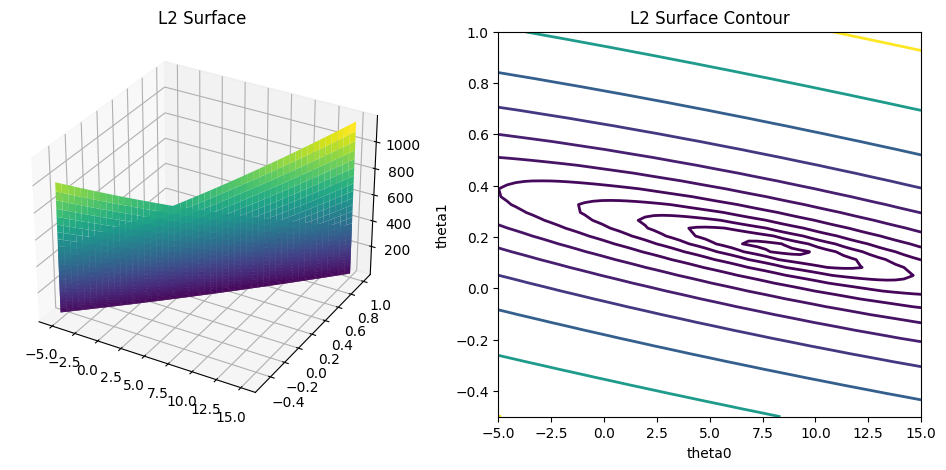

In [11]:
# grid over which we will calculate L2
theta0_vals = np.linspace(-5, 15, 50)
theta1_vals = np.linspace(-0.5, 1, 50)

# initialize L2_vals to a matrix of 0's
L2_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        L2_vals[i, j] = computeCost(Xtrain, ytrain, np.array([theta0, theta1]))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
L2_vals = L2_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, L2_vals, cmap='viridis')
plt.title('L2 Surface')

ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, L2_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
  #plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('L2 Surface Contour')
pass

### Otimizando o valor de L2

O que queremos neste momento é encontrar alguma maneira de encontrar os valores de $\theta_0$ e $\theta_1$ que correspondam ao valor mínimo de $L2(\Theta)$.

Como fazer isto?

Existem basicamente duas maneiras:


*   Através de um método explícito chamado **Método dos Mínimos Quadrados** (mas que só funciona para regressão linear).
*   Através de um método iterativo baseado na idéia de **Descida de Gradiente** (Gradient Descent).



### Método dos Mínimos Quadrados

Também chamado de *Least Square Regression* ou *Normal Equation* é um método que consiste na ideia de que a superfície do erro tem a forma de uma parábola e portanto o ponto de mínimo de uma parábola é aquele onde a derivada (tangente da reta que corta a função em um ponto) é zero (0).

A solução de forma fechada para a regressão linear, considerando a abordagem vetorizada dos dados, é:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

<div class = "alert alert-block alert-warning">
** Nota de implementação: ** Nós armazenamos cada exemplo como uma linha na matriz $ X $ `numpy` em Python . Para levar em consideração o termo de intercept ($ \theta_0 $), adicionamos uma primeira coluna a $ X $ com o valor 1 (um) para todas as linhas. Isso nos permite tratar $ \theta_0 $ simplesmente como mais um dado de entrada (sempre igual a 1).
</div>

In [12]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.

    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).

    y : array_like
        The value at each data point. A vector of shape (m, ).

    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).

    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.

    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    We still need to add a column of 1’s to the $X$ matrix to have an
    intercept term ($\theta_0$). The code in the next cell will add the
    column of 1’s to X for you.
    """
    m = y.size

    # make a copy of X and theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    Xin = X.copy()

    # Add a column of ones to X. The numpy function stack joins arrays along a given axis.
    # The first axis (axis=0) refers to rows (training examples)
    # and second axis (axis=1) refers to columns (features).
    a = np.ones((m,1))
    Xin = np.hstack((a, Xin))

    theta = np.zeros((Xin.shape[1],1))
    # ===================== YOUR CODE HERE ============================

    theta = np.linalg.pinv(Xin.T @ Xin) @ Xin.T @ y

    # =================================================================
    return theta

Vamos agora calcular os valores de $\theta_0$ e $\theta_1$ que são os parâmetros da melhor reta que modela a relação entre Porosidade e Tamanho de Grãos no nosso primeiro problema.

In [13]:
def plotData(X,y,theta):
  plt.scatter(X,y,c='red')

  x0 = min(X)
  x1 = max(X)

  y0 = theta[0] + theta[1]*x0
  y1 = theta[0] + theta[1]*x1
  x_values = [x0, x1]
  y_values = [y0, y1]
  plt.plot(x_values, y_values, '-k')

Theta computed from the normal equations: [[8.11744171]
 [0.15842573]]
Mean Squared Error for training data computed from obtained Thetas: 1.8022456600920251
Root Mean Squared Error for training data computed from obtained Thetas: 1.3424774337366068


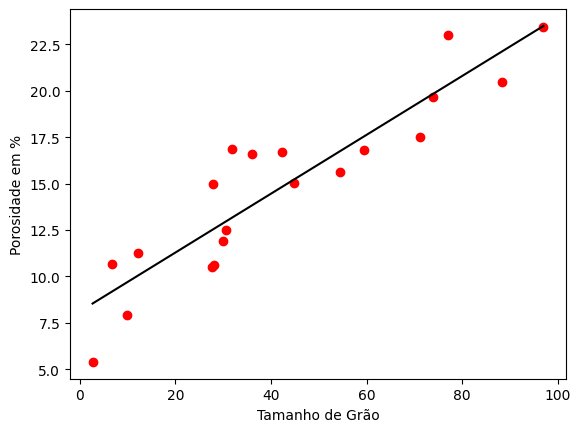

In [14]:
# Calculate the parameters from the normal equation
theta = normalEqn(Xtrain, ytrain)
#print(theta)
# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));
plotData(Xtrain,ytrain,theta)
plt.xlabel('Tamanho de Grão')
plt.ylabel('Porosidade em %')
print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xtrain, ytrain, theta))));
print('Root Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(np.sqrt(computeCost(Xtrain, ytrain, theta)))));

Vamos agora calcular o valor predito pelo modelo e plotar a **Regressão** entre o valor real e o valor predito pelo modelo.

---



In [15]:
def plotRegression(target,predicted):
   # Using sklearn
   from sklearn.metrics import r2_score
   from sklearn.linear_model import LinearRegression

   plt.title('R2: ' + str(r2_score(target, predicted)))
   plt.scatter(target,predicted,c='red')
   plt.xlabel('Target')
   plt.ylabel('Predicted')

   x0 = target.min()
   x1 = target.max()

   y0 = (LinearRegression().fit(target, predicted).predict(x0.reshape(1,-1))).flatten()
   y1 = (LinearRegression().fit(target, predicted).predict(x1.reshape(1,-1))).flatten()

   x_values = [x0, x1]
   y_values = [y0, y1]

   plt.plot(x_values, y_values,'-.k')

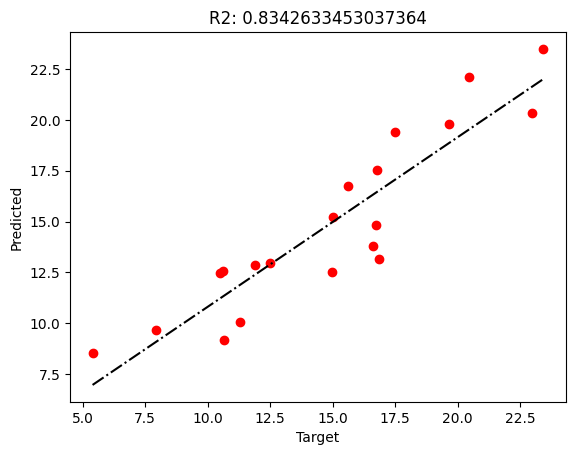

In [16]:
Xin = []
Xin = np.hstack((np.ones((m,1)),Xtrain)) # Add a column of ones to X.
ypred = Xin @ theta
plotRegression(ytrain,ypred)

A biblioteca scikit-learn possui uma função pronta que calcula os parâmetros ótimos de uma regressão linear usando o método dos mínimos quadrados.

Esta função se chama LinearRegression e você pode ler mais sobre ela [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Vamos agora achar os mesmos parâmetros usando a LinearRegression do scikit-learn.

[[0.15842573]]
[8.11744171]
Theta computed from the scikit-learn LinearRegression: [[8.11744171]
 [0.15842573]]
Mean Squared Error for training data computed from obtained Thetas: 1.8022456600920247
Root Mean Squared Error for training data computed from obtained Thetas: 1.3424774337366066


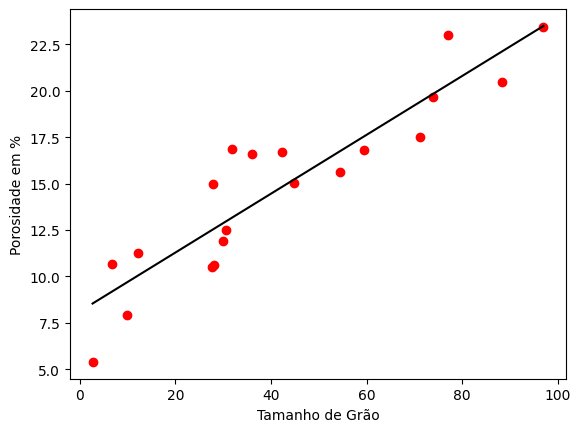

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept = True, copy_X = True, n_jobs = 1)
# Calculate the parameters from sklearn LinearRegression
lr.fit(Xtrain, ytrain)
print(lr.coef_)
print(lr.intercept_)
theta = np.array([lr.intercept_, lr.coef_[0]])

# Display scikit-leran LinearRegression's result
print('Theta computed from the scikit-learn LinearRegression: {:s}'.format(str(theta)));
plotData(Xtrain,ytrain,theta)
plt.xlabel('Tamanho de Grão')
plt.ylabel('Porosidade em %')

print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xtrain, ytrain, theta))));
print('Root Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(np.sqrt(computeCost(Xtrain, ytrain, theta)))));

### Método de Gradiente Descendente

Vamos recapitular o que já aprendemos sobre Regressão Linear:

Conhecemos a função de custo EMQ e como minimizá-la utilizando o Método dos Mínimos Quadrados.

Caso tenha alguma dúvida sobre esses assuntos, volte e reveja os conceitos.

Acabamos de treinar um modelo de Regressão Linear utilizando o Método dos Mínimos Quadrados. Este método se torna muito lento quando o número de características cresce bastante. A seguir, veremos um método mais adequado para um grande número de características.

O Gradiente Descendente é um algoritmo de otimização que realiza o ajuste de parâmetros de forma iterativa com o objetivo de encontrar o valor $\theta_0$ e $\theta_1$ que minimiza a função de interesse. Ou seja, a reta que melhor se ajusta aos dados.

O método inicia preenchendo $\theta_0$ e $\theta_1$ com valores aleatórios, e melhora gradualmente a cada iteração, dando um pequeno passo de cada vez até que o algoritmo convirja para um mínimo. O tamanho dos passos é definido pelo hiperparâmetro taxa de aprendizado.

Se a taxa de aprendizado for muito pequena, o algoritmo levará muito tempo para convergir devido ao grande número de iterações. Se a taxa de aprendizado for muito alta, o algoritmo poderá ultrapassar o mínimo, não encontrando uma boa solução.

**Gradiente Descendente em Lote**

Para implementar o Gradiente Descendente, precisamos calcular quanto mudará a função custo se alterarmos apenas um pouco do $\theta_j$. Isto é chamado derivada parcial. A derivada nos dá a taxa de variação de uma função em um determinado ponto, quando temos uma taxa de variação igual a zero, significa que atingimos um ponto plano da função, esse ponto pode ser um mínimo local ou mínimo global. Mínimos locais são um dos principais desafios do Gradiente Descendente, pois a solução não é tão boa quanto o mínimo global.

Felizmente, a função de custo EQM para o problema da Regressão Linear tem apenas um único ponto de mínimo que é portanto o mínimo global.

O objetivo da Regressão Linear é minimizar a função de custo

$$ L2 (\Theta) = \frac {1} {2m} \sum_{i = 1}^m \left (h_{\theta} (x^{(i)}) - y^{(i)} \right)^2 $$

onde a hipótese $h_\theta (x) $ é dada pelo modelo linear
$$ h_\theta(X) = \theta^TX = \theta_0 + \theta_1 x_1 $$

Lembre-se de que os parâmetros do seu modelo são os valores $ \theta_j $. Estes são os valores que devemos ajustar para minimizar o custo $ L2(\Theta) $. Uma maneira de fazer isso é usar o algoritmo de descida gradiente em lote. Na descida do gradiente do lote, cada iteração realiza a atualização

$$ \theta_j = \theta_j - \alpha \frac {1} {m} \sum_ {i = 1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right) x_j^{(i)} \qquad \text{ atualizar simultaneamente } \theta_j \text { para todos } j$$
onde
$$\frac {1} {m} \sum_ {i = 1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$ é a **derivada** de $ L2 (\Theta)$  em relação a cada parâmetro $\theta_j$ (para simplificar a fórmula de deriada é que dividimos por 2 a função de custo).

A cada passo da descida do gradiente, seus parâmetros $ \theta_j $ se aproximam dos valores ótimos que atingirão o menor custo L2 ($ \Theta $).

Para mais informação e visualizar algumas figuras bem informativas sobre o Método do Gradiente Descendente, leia este [artigo](https://medium.com/@bruno.dorneles/regress%C3%A3o-linear-com-gradiente-descendente-d3420b0b0ff).

<div class = "alert alert-block alert-warning">
** Nota de implementação: ** Nós armazenamos cada exemplo como uma linha na matriz $ X $ `numpy` em Python . Para levar em consideração o termo de intercept ($ \theta_0 $), adicionamos uma primeira coluna a $ X $ com o valor 1 (um) para todas as linhas. Isso nos permite tratar $ \theta_0 $ simplesmente como mais um dado de entrada (sempre igual a 1).
</div>

In [18]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).

    y : arra_like
        Value at given features. A vector of shape (m, 1).

    theta : array_like
        Initial values for the linear regression parameters.
        A vector of shape (n+1, ).

    alpha : float
        The learning rate.

    num_iters : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).

    J_history : list
        A python list for the values of the cost function after each iteration.

    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of
    the cost function (computeCost) and gradient here.
    """
    # transform theta to a 2D-array
    #theta = theta.reshape(-1,1)
    # Initialize some useful values
    m = y.size  # number of training examples

    # make a copy of X and theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    Xin = X.copy()
    theta_tmp = theta.copy()



    # Add a column of ones to X. The numpy function stack joins arrays along a given axis.
    # The first axis (axis=0) refers to rows (training examples)
    # and second axis (axis=1) refers to columns (features).
    a = np.ones((m,1))
    Xin = np.hstack((a, Xin))
    theta_tmp = np.reshape(theta_tmp,(Xin.shape[1],1))

    J_history = []      # Use a python list to save cost in every iteration
    theta0_history = [] # Use a python list to save theta0 in every iteration
    theta1_history = [] # Use a python list to save theta1 in every iteration

    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================

        aux = np.dot(Xin, theta_tmp) - y
        aux = np.dot(Xin.T, aux)
        theta_tmp = theta_tmp - (alpha/m) * aux

        # ==========================    ===========================================

        # save the theta0 and theta1 and cost J in every iteration

        aux1 = theta_tmp.flatten()
        theta0_history.append(aux1[0])
        theta1_history.append(aux1[1])
        J_history.append(computeCost(X, y, np.array([theta_tmp[0],theta_tmp[1]])))

    return theta_tmp, theta0_history, theta1_history, J_history

Vamos agora calcular os valores de  $\theta_0$  e  $\theta_1$  que são os parâmetros da melhor reta que modela a relação entre Porosidade e Tamanho de Grãos no nosso primeiro problema.

In [19]:
# initialize fitting parameters
theta = np.zeros(Xtrain.shape[1]+1)

# some gradient descent settings
iterations = 50000
alpha = 0.0007

theta, theta0_history, theta1_history, L2_history = gradientDescent(Xtrain ,ytrain, theta, alpha, iterations)

print('Theta computed from the gradient descent: {:s}'.format(str(theta)));
print('Expected theta values (approximately): [8.117, 0.158]')

print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xtrain, ytrain, theta))));
print('Root Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(np.sqrt(computeCost(Xtrain, ytrain, theta)))));

Theta computed from the gradient descent: [[8.11706155]
 [0.15843211]]
Expected theta values (approximately): [8.117, 0.158]
Mean Squared Error for training data computed from obtained Thetas: 1.8022456806771188
Root Mean Squared Error for training data computed from obtained Thetas: 1.342477441403437


Uma maneira de ver se nosso algoritmo está funcionando é plotar o valor de $L2(\Theta)$ ao longo da iterações (épocas) do Gradiente Descendente.

É o que vamos fazer agora.

Você pode alterar os valores de iteration e alpha na rotina acima e ver o que acontece com o progresso do Gradiente Descendente e se ele consegue convergir para a resposta aceitável.

Text(0, 0.5, 'Custo (L2)')

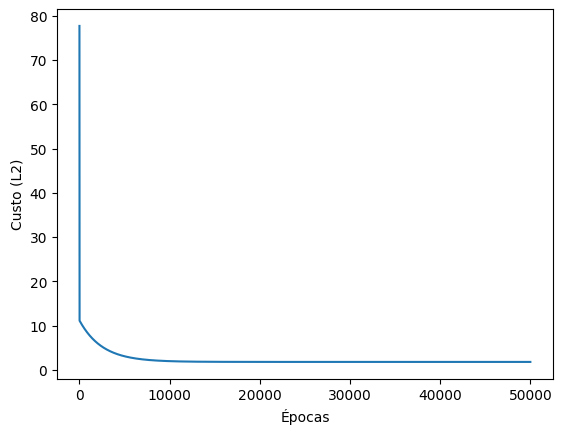

In [20]:
plt.plot(L2_history)
plt.xlabel('Épocas')
plt.ylabel('Custo (L2)')

Podemos ver também como $\theta_0$ e $\theta_1$ se alteram à medida que o "treinamento" do Gradiente Descendente prossegue ao longo das épocas.

In [21]:
def plotL2surface(X,y, theta0_vals, theta1_vals):

  # initialize L2_vals to a matrix of 0's
  L2_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

  # Fill out J_vals
  for i, theta0 in enumerate(theta0_vals):
       for j, theta1 in enumerate(theta1_vals):
                 L2_vals[i, j] = computeCost(X, y, np.array([theta0, theta1]))

  # Because of the way meshgrids work in the surf command, we need to
  # transpose J_vals before calling surf, or else the axes will be flipped
  L2_vals = L2_vals.T

  plt.contour(theta0_vals, theta1_vals, L2_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
  plt.xlabel('theta0')
  plt.ylabel('theta1')
  #plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
  plt.title('L2 Surface Contour')
  pass

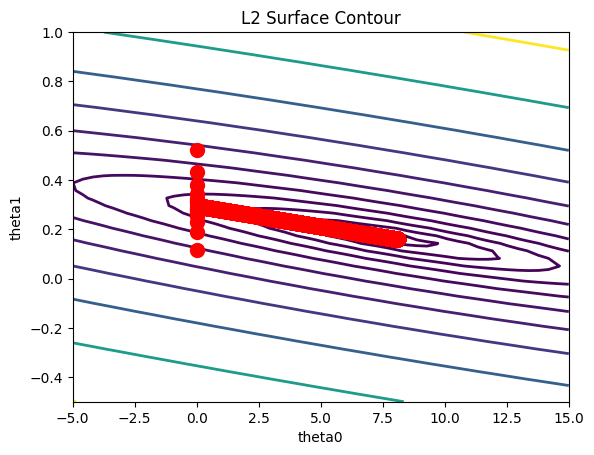

In [22]:
# grid over which we will calculate L2
theta0_vals = np.linspace(-5, 15, 50)
theta1_vals = np.linspace(-0.5, 1, 50)
plotL2surface(Xtrain,ytrain,theta0_vals, theta1_vals)
for i in range(len(theta0_history)):
  plt.plot(theta0_history[i],theta1_history[i],'ro', ms=10, lw=2)


Agora você pode alterar os valores de alpha (o tamanho do passo - também chamada de taxa de aprendizado) e observar se o algortimo converge no número de passos (épocas) que está especificado. Experimente valores de alpha como 0.001, 0.0007, 0.00007, 0,0001, etc. Diga o que você observou.

## Normalização

Se você olhar para a Superfície do Erro, vai perceber que ela se parece com uma "fenda" e dependendo do valor do "passo" (taxa de aprendizado) a descida do gradiente pode "pular" para o outro lado da superfície, dificultando e atrasando a velocidade de descida pela superfície até o ponto de mínimo.

Vamos ver o que acontece com a velocidade do gradiente descendente se fizermos um passo **antes** de aplicarmos o algoritmo de aprendizado de máquina no que chamaríamos de **pré-processamento** e **NORMALIZARMOS** os valores de X entre 0 e 1...

A biblioteca scikit-learn tem uma funçaõ pronta para fazer a **normalização** das variáveis. Esta função se chama **MinMaxScaler**.

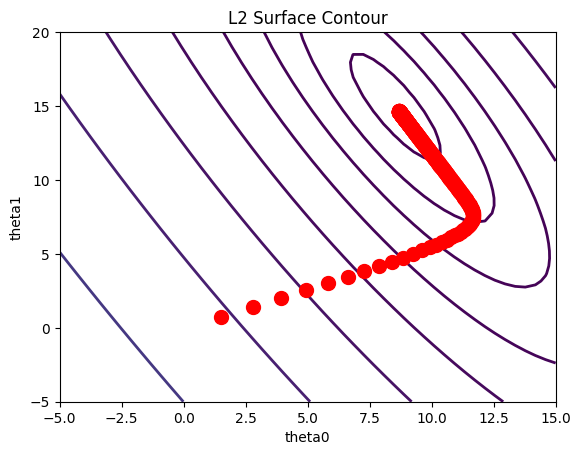

In [23]:
from sklearn.preprocessing import MinMaxScaler

Xnorm = MinMaxScaler() # we need to work with the 2D-array version of the input data
Xnorm = Xnorm.fit_transform(Xtrain)

theta = np.zeros(2)
theta0_history = []
theta1_history = []
L2_history = []
iterations = 500
alpha = 0.1
theta, theta0_history, theta1_history, L2_history = gradientDescent(Xnorm ,ytrain, theta, alpha, iterations)

# grid over which we will calculate L2
theta0_vals = np.linspace(-5, 15, 50)
theta1_vals = np.linspace(-5, 20, 50)
plotL2surface(Xnorm,ytrain,theta0_vals, theta1_vals)
for i in range(len(theta0_history)):
  plt.plot(theta0_history[i],theta1_history[i],'ro', ms=10, lw=2)


Agora podemos observar como a normalização da variável de entrada fez com que a superfície de erro ficasse mais "arredondada" em todas as dimensões. Isto facilita muito a tarefa de descida pela superfície de erro pelo método de gradiente descendente.

Você pode ler mais sobre normalização e standardização e sua importância em algumas técnicas de aprendizado de máquina [neste artigo](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/).

A biblioteca scikit-learn possui uma função pronta que calcula os parâmetros de uma regressão linear usando o método do gradiente descendente.

Esta função se chama SGDRegressor e você pode ler mais sobre ela [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html?highlight=sgdregressor#sklearn.linear_model.SGDRegressor).

Vamos agora achar os mesmos parâmetros usando a SGDRegressor do scikit-learn.

SGDRegressor(eta0=7e-05, learning_rate='constant')
[0.14447981]
[8.12935431]


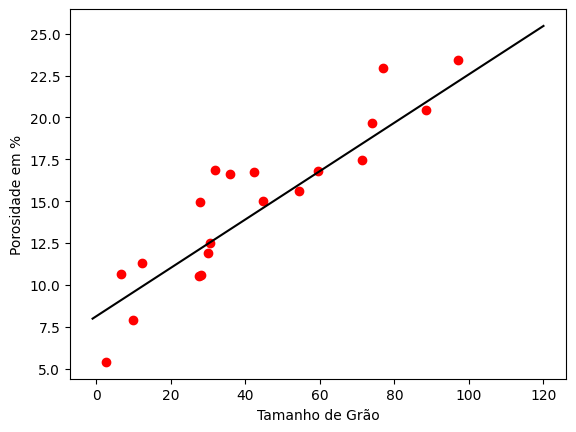

In [24]:
from sklearn.linear_model import SGDRegressor

alpha = 0.00007
iterations = 30000
reg = SGDRegressor(learning_rate='constant',eta0=alpha)
print(reg)
for i in range(iterations):
  reg.partial_fit(Xtrain,y)

print(reg.coef_)
print(reg.intercept_)

theta = [reg.intercept_, reg.coef_[0]]

plt.scatter(Xtrain,ytrain,c='red')
plt.xlabel('Tamanho de Grão')
plt.ylabel('Porosidade em %')

xtest = np.linspace(-1,120,50)
ytest = theta[0] + theta[1]*xtest
plt.plot(xtest,ytest,'-k')

[14.2493893]
[8.86641406]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


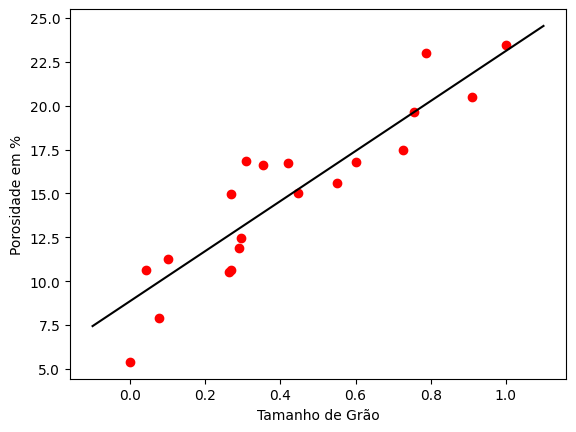

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

Xnorm = MinMaxScaler()
Xnorm = Xnorm.fit_transform(Xtrain)

alpha = 0.1
iterations = 500
sgdr = SGDRegressor(max_iter=iterations,learning_rate='constant',eta0=alpha)
sgdr.fit(Xnorm, ytrain)

print(sgdr.coef_)
print(sgdr.intercept_)

theta = [sgdr.intercept_, sgdr.coef_[0]]

plt.scatter(Xnorm,ytrain,c='red')
plt.xlabel('Tamanho de Grão')
plt.ylabel('Porosidade em %')

xtest = np.linspace(-0.1,1.1,50)
ytest = theta[0] + theta[1]*xtest
plt.plot(xtest,ytest,'-k')

# Regressão Polinomial

Como podemos resolver o problema de Regressão se a **Hipótese Linear** não for uma boa hipótese para explicar como os dados do nosso problema se relacionam?

Vamos agora buscar um novo conjunto de dados.

### No nosso segundo exemplo, vamos ler o arquivo NonlinearPor_Perm_data.csv que contém os dados de permeabilidade e porosidade de uma série de amostras de rochas.


In [26]:
url="https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/NonlinearPor_Perm_data.csv"
df=pd.read_csv(url)
df.head()

,Index,PorosityA,PermeabilityA,LogPorA,LogPermA,PorosityB,PermeabilityB,LogPorB,LogPermB
0,1,16.0,435.0,1.2,2.638489,10.0,101.9,1.0,2.008239
1,2,19.7,543.0,1.3,2.734800,9.1,86.1,1.0,1.934981
2,3,17.0,342.0,1.2,2.534026,9.6,103.0,1.0,2.012881
3,4,19.1,761.0,1.3,2.881385,14.6,243.5,1.2,2.386511
4,5,11.1,170.3,1.0,2.231160,12.9,159.0,1.1,2.201311


Vamos usar por enquanto as variáveis PorosityA e PermeabilityA.

Depois de lidas elas são colocadas em 2D arrays.

In [27]:
for x in df.columns:                                        # find the names of the columns!
    print(x)                                                # other option is:      list(df.columns)

data = df.to_numpy()
X = data[:,1]
y = data[:,2]

m = y.size        # number of training examples
print('Número de exemplos de treinamento: ',m)

Xtrain, ytrain = np.expand_dims(X,axis=1), np.expand_dims(y,axis=1) # lets put the data in 2D-array format!!!!


Index
PorosityA
PermeabilityA
LogPorA
LogPermA
PorosityB
PermeabilityB
LogPorB
LogPermB
Número de exemplos de treinamento:  105


###Vamos plotar os nossos dados:

Lembre-se que neste caso, temos apenas 2 variáveis portanto é fácil visualizar plotar em um gráfico 2D. Na vida real, nem sempre isto é tão simples assim.

Text(0, 0.5, 'Permeabilidade (mD)')

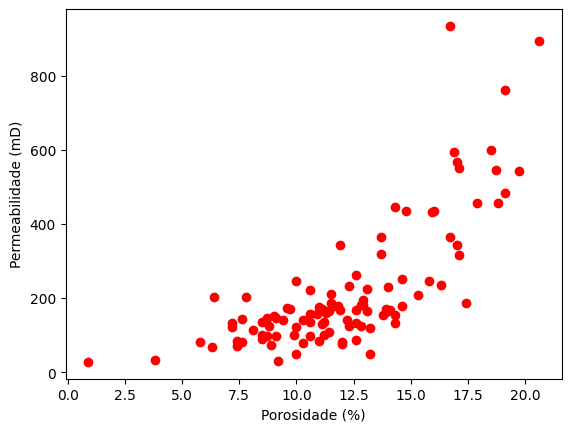

In [28]:
plt.scatter(Xtrain,ytrain,c='red')
plt.xlabel('Porosidade (%)')
plt.ylabel('Permeabilidade (mD)')

### Vamos ver como se sairia uma hipótese linear para este problema:

Theta computed from the normal equations: [[-217.25321962]
 [  36.05722332]]
(105, 1)
Mean Squared Error for training data computed from obtained Thetas: 6627.113485649895
Root Mean Squared Error for training data computed from obtained Thetas: 81.40708498435437


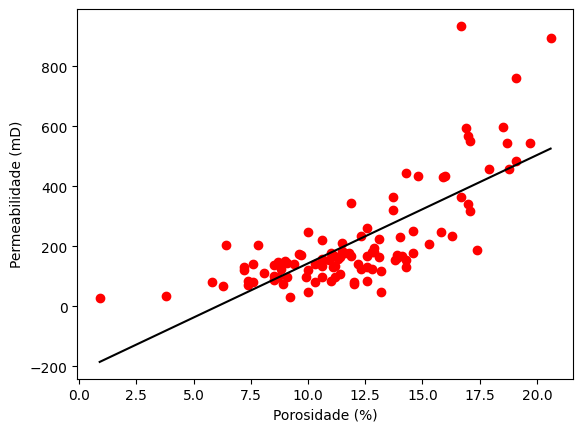

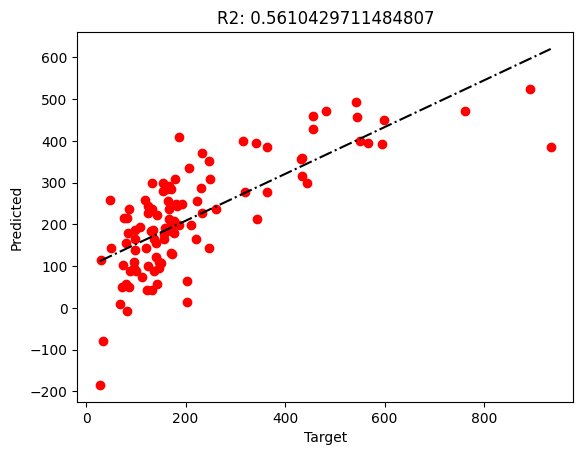

In [29]:
# Calculate the parameters from the normal equation
theta = normalEqn(Xtrain, ytrain)

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));
plotData(Xtrain,ytrain,theta)
plt.xlabel('Porosidade (%)')
plt.ylabel('Permeabilidade (mD)')

print(Xtrain.shape)
print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xtrain, ytrain, theta))));
print('Root Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(np.sqrt(computeCost(Xtrain, ytrain, theta)))));

plt.figure()
Xin = []
Xin = np.hstack((np.ones((m,1)),Xtrain)) # Add a column of ones to X.
ypred = Xin @ theta
plotRegression(ytrain,ypred)

Até aqui, os modelos que criamos só foram utilizados para aprender relações lineares. Felizmente, é bastante simples modificá-los para que possamos aprender qualquer tipo de relação nos dados. Na verdade, sequer vamos modificar o algoritmo de treino em si; a única coisa que precisaremos fazer será forjar algumas variáveis novas a partir dos nossos dados.

### Vamos agora produzir uma nova variável de entrada fazendo uma **transformação não-linear** na nossa variável de entrada (Porosidade) original.

Podemos criar uma nova variável de entrada


*   Elevando ao quadrado o valor da variável original
*   Elevando ao cubo o valor da variável original
*   Tirando a raiz quadrada da variável original
*   etc...





Theta computed from the normal equations: [[-29.18504633]
 [  1.55670384]]
Mean Squared Error for training data computed from obtained Thetas: 5299.771886278261
Root Mean Squared Error for training data computed from obtained Thetas: 72.79953218447397


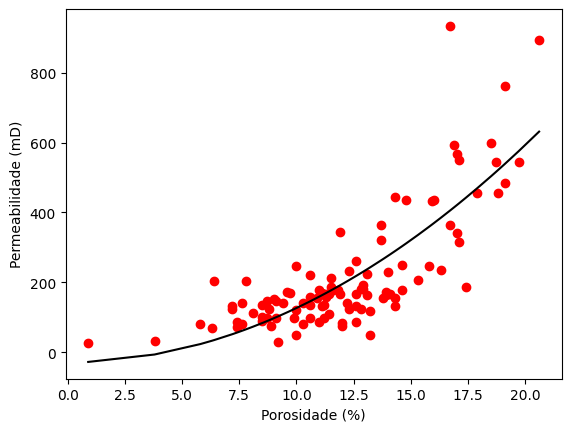

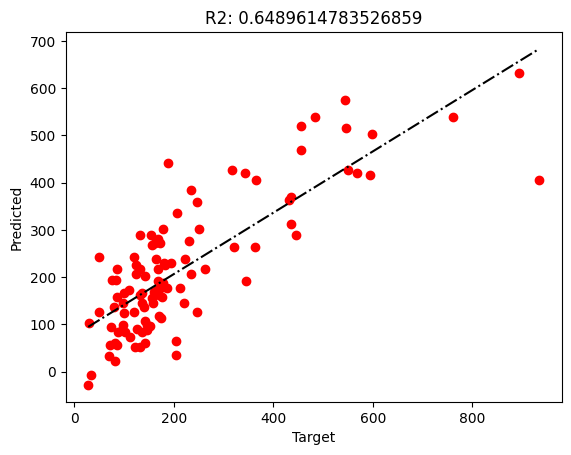

In [30]:
# Vamos elevar criar uma nova variável elevando ao quadrado a variável original
# e fazendo uma regressão linear via Método dos Mínimos Quadrados
# usando a variável transformada como entrada
Xnew = np.power(Xtrain,2)
theta = normalEqn(Xnew, ytrain)

Xin = []
Xin = np.hstack((np.ones((m,1)),Xnew))
ypred = Xin @ theta

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));
print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xnew, ytrain, theta))));
print('Root Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(np.sqrt(computeCost(Xnew, ytrain, theta)))));

plt.scatter(Xtrain,ytrain,c='red')
plt.plot(Xtrain[Xtrain[:, 0].argsort()],ypred[Xtrain[:, 0].argsort()],'-k')
plt.xlabel('Porosidade (%)')
plt.ylabel('Permeabilidade (mD)')

plt.figure()
plotRegression(ytrain,ypred)

Theta computed from the normal equations: [[1.30824554e+02]
 [1.03615220e-05]]
Mean Squared Error for training data computed from obtained Thetas: 4877.501122246802
Root Mean Squared Error for training data computed from obtained Thetas: 69.83910883056


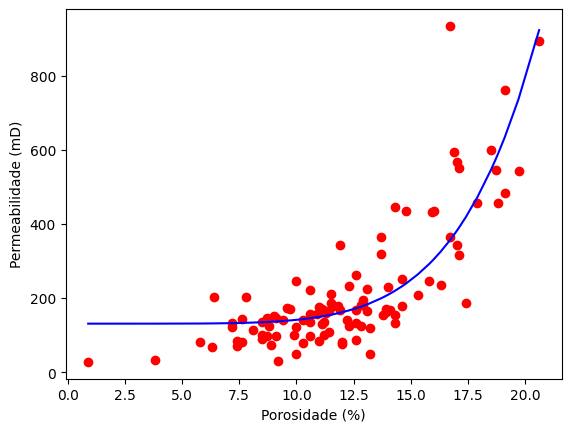

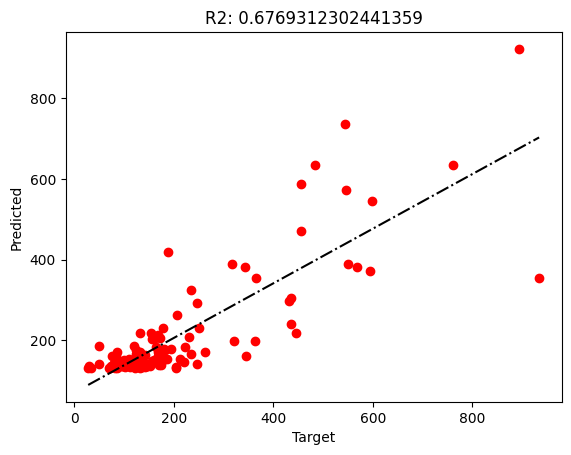

In [31]:
# Vamos elevar criar uma nova variável elevando ao cubo a variável original
# e fazendo uma regressão linear via Método dos Mínimos Quadrados
# usando a variável transformada como entrada
Xnew = np.power(Xtrain,6)
theta = normalEqn(Xnew, ytrain)

Xin = []
Xin = np.hstack((np.ones((m,1)),Xnew))
ypred = Xin @ theta

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));
print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xnew, ytrain, theta))));
print('Root Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(np.sqrt(computeCost(Xnew, ytrain, theta)))));

plt.scatter(Xtrain,ytrain,c='red')
plt.plot(Xtrain[Xtrain[:, 0].argsort()],ypred[Xtrain[:, 0].argsort()],'-b')
plt.xlabel('Porosidade (%)')
plt.ylabel('Permeabilidade (mD)')

plt.figure(2)
plotRegression(ytrain,ypred)

Theta computed from the normal equations: [[-524.99178561]
 [ 216.68562453]]
Mean Squared Error for training data computed from obtained Thetas: 7872.866053266638
Root Mean Squared Error for training data computed from obtained Thetas: 88.72917250412425


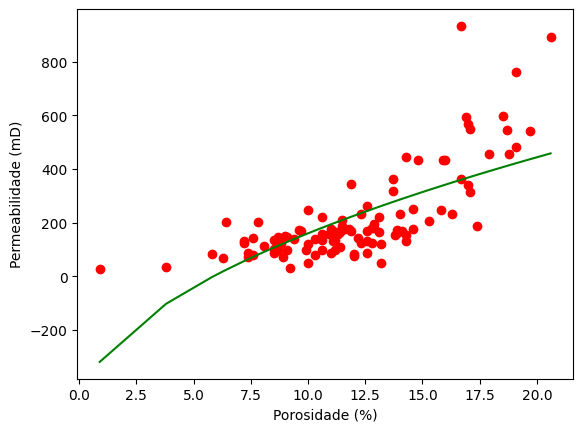

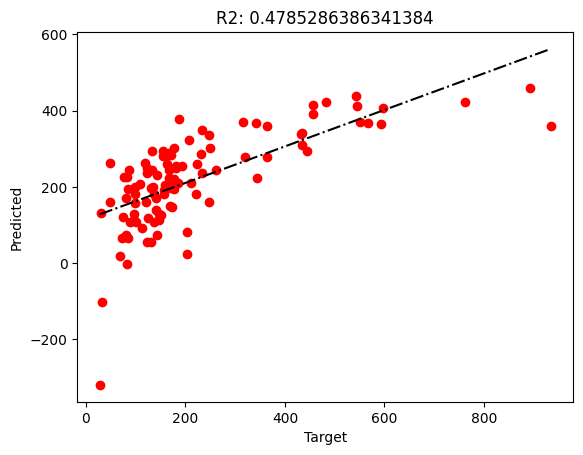

In [32]:
# Vamos elevar criar uma nova variável tirando a raiz quadrada da variável original
# e fazendo uma regressão linear via Método dos Mínimos Quadrados
# usando a variável transformada como entrada
Xnew = np.sqrt(Xtrain)
theta = normalEqn(Xnew, ytrain)

Xin = []
Xin = np.hstack((np.ones((m,1)),Xnew))
ypred = Xin @ theta

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));
print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xnew, ytrain, theta))));
print('Root Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(np.sqrt(computeCost(Xnew, ytrain, theta)))));

plt.scatter(Xtrain,ytrain,c='red')
plt.plot(Xtrain[Xtrain[:, 0].argsort()],ypred[Xtrain[:, 0].argsort()],'-g')
plt.xlabel('Porosidade (%)')
plt.ylabel('Permeabilidade (mD)')

plt.figure(2)
plotRegression(ytrain,ypred)

Por fim, podemos criar **várias entradas** para o nosso problema, e então fazer uma **REGRESSÃO LINEAR MÚLTIPLA** (A Regressão Linear Múltipla é um modelo de análise que usamos quando modelamos a relação linear entre uma variável de desfecho contínua e múltiplas variáveis preditoras que podem ser contínuas ou categóricas.).

Cada uma destas novas entradas é a variável de entrada original elevada a algum grau, no que chamamos então de **REGRESSÃO POLINOMIAL**.

Theta computed from the normal equations: [[ 1.99184917e+00]
 [ 6.49957238e+00]
 [ 1.39559849e+01]
 [-3.56841531e+00]
 [ 3.42196765e-01]
 [-1.40919250e-02]
 [ 2.17000934e-04]]
Mean Squared Error for training data computed from obtained Thetas: 4429.725610988073
Root Mean Squared Error for training data computed from obtained Thetas: 66.55618386737683


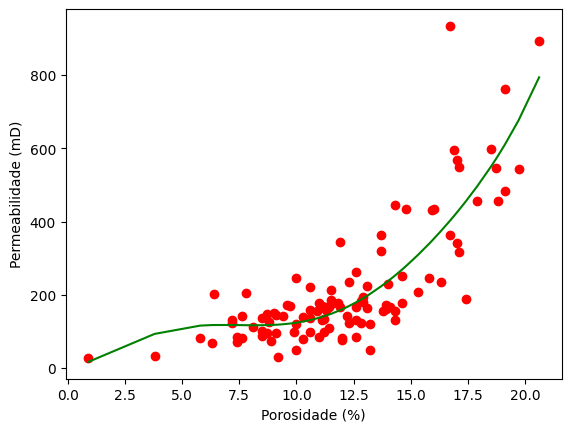

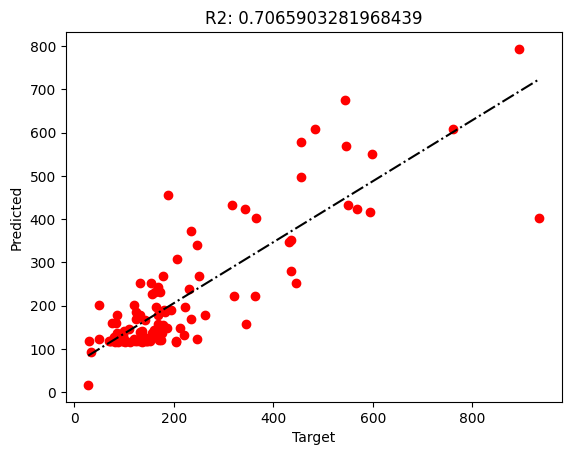

In [33]:
# Vamos elevar criar 5 novas variáveis a partir da variável de entrada original
# (elevando ao quadrado, ao cubo, à quarta, à quinta e à sexta potência)
# e fazendo uma regressão linear via Método dos Mínimos Quadrados
# usando a variável original e as variáveis transformadas como entrada
Xnew = np.concatenate((Xtrain,np.power(Xtrain,2),np.power(Xtrain,3),np.power(Xtrain,4),np.power(Xtrain,5),np.power(Xtrain,6)), axis=1)
theta = normalEqn(Xnew, ytrain)

Xin = []
Xin = np.hstack((np.ones((m,1)),Xnew))
ypred = Xin @ theta

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));
print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xnew, ytrain, theta))));
print('Root Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(np.sqrt(computeCost(Xnew, ytrain, theta)))));

plt.scatter(Xtrain,ytrain,c='red')
plt.plot(Xtrain[Xtrain[:, 0].argsort()],ypred[Xtrain[:, 0].argsort()],'-g')
plt.xlabel('Porosidade (%)')
plt.ylabel('Permeabilidade (mD)')

plt.figure(2)
plotRegression(ytrain,ypred)

Teoricamente, podemos aproximar qualquer função com um polinômio. Então, nós vamos utilizar esse fato para estender regressão linear para regressão polinomial. A ideia é bastante simples: a partir das variáveis existentes, nós vamos construindo novas variáveis polinomiais e a regressão com elas terá mais capacidade quanto maior o grau do polinômio criado. É importante ressaltar que o algoritmo de regressão linear não muda! A única coisa que muda é que agora forjamos várias variáveis polinomiais, por exemplo, elevando elas ao quadrado, ao cubo, à quarta, etc.

Você pode ler mais sobre Regressão Polinomial [aqui](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491).

O Scikit-learn tem funções prontas para fazer Regressão Polinomial. Veja no exemplo abaixo:

In [34]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(X,y,degree):
  "Creates a polynomial regression model for the given degree"

  poly_features = PolynomialFeatures(degree=degree)

  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X)

  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y)

  return X_train_poly, poly_model

Raiz Quadrada do Erro Médio Quadrático =  93.38829815456803


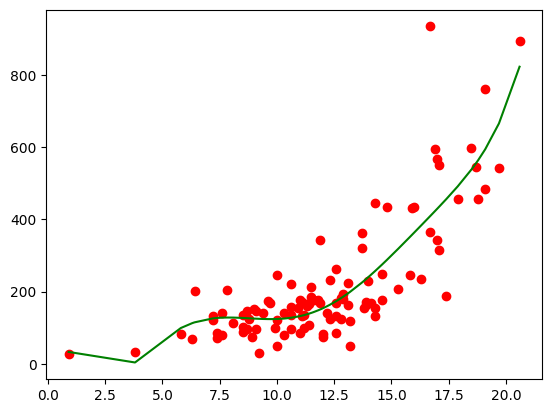

In [35]:
from sklearn.metrics import mean_squared_error

Xnew, model = create_polynomial_regression_model(Xtrain,ytrain,6)
ypred = model.predict(Xnew)
plt.scatter(Xtrain,ytrain,c='red')
plt.plot(Xtrain[Xtrain[:, 0].argsort()],ypred[Xtrain[:, 0].argsort()],'-g')
RMSE = np.sqrt(mean_squared_error(ytrain, ypred))
print('Raiz Quadrada do Erro Médio Quadrático =  {:s}'.format(str(RMSE)));

Experimente criar outros polinômios e veja se o CUSTO (o desempenho) do modelo melhora ou piora em função do grau do polinômio.

## O Dilema Generalização vs. Especialização (*Bias - Variance Tradeoff*)

### Uma questão que aparece nos experimentos acima é: QUAL O MELHOR GRAU DO POLINÔMIO para uma dada regressão polinomial?

Para podermos explorar e responder esta pergunta vamos buscar mais um conjunto de dados...

In [36]:
url="https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv"
df=pd.read_csv(url)
df.head()

,Density,Porosity
0,1.281391,16.610982
1,1.404932,13.668073
2,2.346926,9.590092
3,1.348847,15.877907
4,2.331653,4.968240


In [37]:
for x in df.columns:                                        # find the names of the columns!
    print(x)                                                # other option is:      list(df.columns)

data = df.to_numpy()
X = data[:,0]
y = data[:,1]

m = y.size        # number of training examples
print('Número de exemplos de treinamento: ',m)

Xtrain, ytrain = np.expand_dims(X,axis=1), np.expand_dims(y,axis=1) # lets put the data in 2D-array format!!!!


Density
Porosity
Número de exemplos de treinamento:  105


### Vamos plotar este conjunto de dados e, como hipótese vamos usar um polinômio de alto grau (p.ex.: 20).

Apesar de termos obtido um valor de desempenho (RMSE) bastante adequado, será que esta é a melhor hipótese para explicar o relacionamento entre Porosidade e Densidade? Como ficaria a previsão da Densidade para um valor de Porosidade diferente daqueles presentes no conjunto de dados?

### Agora, vamos usar como hipótese um polinômio de grau bem baixo (p.ex.: 1)

Será que agora a hipótese não ficou simples demais?

Raiz Quadrada do Erro Médio Quadrático =  1.5768948927852873
Raiz Quadrada do Erro Médio Quadrático =  1.7016223431768398


Text(0, 0.5, 'Porosidade em %')

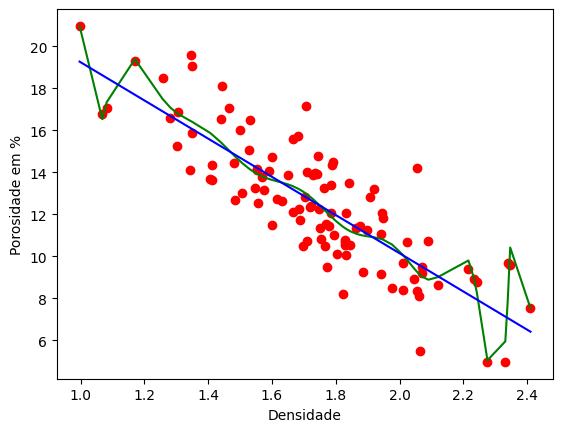

In [38]:
plt.scatter(Xtrain,ytrain,c='red')

Xnew, model = create_polynomial_regression_model(Xtrain,ytrain,20)
ypred = model.predict(Xnew)
plt.plot(Xtrain[Xtrain[:, 0].argsort()],ypred[Xtrain[:, 0].argsort()],'-g')
RMSE = np.sqrt(mean_squared_error(ytrain, ypred))
print('Raiz Quadrada do Erro Médio Quadrático =  {:s}'.format(str(RMSE)));

Xnew, model = create_polynomial_regression_model(Xtrain,ytrain,1)
ypred = model.predict(Xnew)
plt.plot(Xtrain[Xtrain[:, 0].argsort()],ypred[Xtrain[:, 0].argsort()],'-b')
RMSE = np.sqrt(mean_squared_error(ytrain, ypred))
print('Raiz Quadrada do Erro Médio Quadrático =  {:s}'.format(str(RMSE)));

plt.xlabel('Densidade')
plt.ylabel('Porosidade em %')

### Como já sabemos, o objetivo dos modelos de Machine Learning é estimar a função que melhor ajusta aos dados de entrada para obter previsões corretas de forma generalizada. A melhor maneira de medir e otimizar o desempenho do modelo é levar em consideração o viés (*bias*) e a variação (*variance*) resultante, ou seja, queremos que o modelo acerte (generalize bem) o valor para dados novos e AO MESMO TEMPO acerte (explique bem) os dados do Conjunto de Treinamento.

Para termos o modelo mais próximo do ideal, devemos fazer algumas escolhas, se aumentarmos a Variância, inevitavelmente reduziremos o Viés e o contrário também é verdadeiro, reduzindo a Variância, aumentamos o Viés em relação à complexidade do modelo.

À medida que mais e mais parâmetros ($\theta'$s) são adicionados a um modelo, a complexidade dele aumenta e a variância se torna a principal preocupação, enquanto o viés diminui constantemente. [Fonte: Carlos Alberto Bonfim em https://medium.com/data-hackers/o-que-%C3%A9-bias-variance-tradeoff-a5bc19866e4b] . Podemos ver isto na figura abaixo.

![picture](https://drive.google.com/uc?export=view&id=1g_fAK5G-MMq217A99EdL4O9a5_oqMVrR)  
Fonte: http://scott.fortmann-roe.com/docs/BiasVariance.html

O que devemos fazer é tentar encontrar o equilíbrio entre esses dois erros, que melhor atenda ao modelo em treinamento, conforme mostrado na figura abaixo.

![picture](https://drive.google.com/uc?export=view&id=1WyLnhFZPeOY-GqbEDTQNTj4EsCUJ9T27)  
Fonte: http://scott.fortmann-roe.com/docs/BiasVariance.html


## Como encontrar um bom equilíbrio entre o Viés e a Variância?
A parametrização de algoritmos de Machine Learning, ou seja, achar a complexidade certa para o modelo, costuma ser uma batalha para equilibrar o Viés e a Variância.

###Uma maneira de tratar com o dilema e avaliar um modelo proposto é dividindo o Conjunto de Dados disponíveis em 3 sub-conjuntos:


1.   O Conjunto de Treinamento
2.   O Conjunto de Validação
3.   O Conjunto de Teste



*   Dados de treinamento: usado para treinar o modelo.
*   Dados de validação: usado para comparação de diferentes modelos (e hiperparâmetros - vamos falar sobre isto mais tarde).
*   Dados de teste: usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros.

Após treinarmos um modelo, nós podemos medir o seu desempenho para os dados do conjunto de validação. Esta medida nos dará uma idéia da capacidade de **generalização** do modelo treinado.

O ideal é que a Medida de Desempenho (o valor da Função de Custo - *Loss*) de um dado modelo para os dados do Conjunto de Treinamento seja tão pequena quanto  possível, mas **ao mesmo tempo** esta medida, quando calculada para os dados do Conjunto de Validação, seja **parecida**  (na mesma ordem de grandeza)  áquela obtida para os dados do Conjunto de  Treinamento.

O comportamento do custo, à medida que aumentamos a complexidade do modelo pode ser visto na figura abaixo.




![picture](https://drive.google.com/uc?export=view&id=1Cn2Y7Q_QN-tLT8WfV3_PYvHzAx9m81zz)

### Vamos usar a função **train_test_split** do scikit-learn para criar nossa rotina que divide os dados disponíveis nos conjuntos de Treino, Validação e Teste.

In [39]:
from sklearn.model_selection import train_test_split

def my_split_data(X,y, trainp, valp, testp):

  Xtrainset, Xtestset, ytrainset, ytestset = train_test_split(X, y, test_size=(valp+testp), train_size=trainp, random_state=0)

  Xvalset, Xtestset, yvalset, ytestset = train_test_split(Xtestset, ytestset, test_size=(testp/(valp+testp)), random_state=0)

  print(Xtrainset.shape, Xvalset.shape, Xtestset.shape)
  return Xtrainset, Xvalset, Xtestset, ytrainset, yvalset, ytestset

Depois de separar os conjuntos de Treino, Validação e Teste, experimentamos modelos de regressões polinomiais de vários graus e plotamos a Raiz Quadrada do Erro Médio Quadrático para os conjuntos de treino e validação deste vários modelos.

(52, 1) (47, 1) (6, 1)


Text(0, 0.5, 'RMSE')

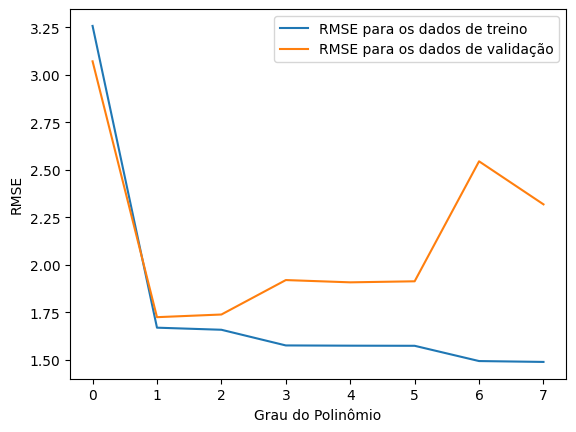

In [40]:
RMSE_train = []
RMSE_val = []

train_size = 0.5  # Lets choose 50% of available data to train the model
val_size = 0.45   # Lets choose 45% of available data do validate the model
test_size = 0.05
Xtrainset, Xvalset, Xtestset, ytrainset, yvalset, ytestset = my_split_data(Xtrain, ytrain, trainp=train_size, valp=val_size, testp=test_size)


for degree in range(8):
  poly_features = PolynomialFeatures(degree=degree)
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(Xtrainset)
  X_val_poly = poly_features.fit_transform(Xvalset)
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, ytrainset)

  ypred = poly_model.predict(X_train_poly)
  RMSE_train.append(np.sqrt(mean_squared_error(ytrainset, ypred)))
  ypred = poly_model.predict(X_val_poly)
  RMSE_val.append(np.sqrt(mean_squared_error(yvalset, ypred)))

plt.plot(RMSE_train,label='RMSE para os dados de treino')
plt.plot(RMSE_val, label='RMSE para os dados de validação')
plt.legend()
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')


Pelo gráfico acima, podemos ver que um polinômio do 2o. grau é um bom modelo em termos de capacidade simultânea de especialização e de generalização para os dados de Densidade x Porosidade.

## Outra maneira de tentar criar um modelo bem equilibrado entre Generalização e Especialização é através da **REGULARIZAÇÃO**.

## Mas esta técnica nós vamos ver com mais detalhes mais adiante no nosso curso!
